# 1. Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings; warnings.simplefilter('ignore')
from code_files_feature_extraction import *

%matplotlib inline

# 2. Data gathering

In [2]:
arp_df = pd.read_csv('US_Accidents_June20.csv')

In [3]:
arp_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


# 3. Data pre-processing and cleaning

In [4]:
mod1_arp_df = get_time_features(arp_df) #5 columns added: accDuration, day, month, year, dayOfWeek
mod2_arp_df = convert_boolean_features(mod1_arp_df) #13 columns converted
mod3_arp_df = rename_bracketed_columns(mod2_arp_df) #8 columns renamed

geo-time features ...
accDuration added to the df in 14 sec
boolean conversion features ...
renaming few weather columns ...


In [5]:
# Get the percentage of missing values for each column
mod3_arp_df.isnull().sum()/mod3_arp_df.shape[0]*100

ID                        0.000000
Source                    0.000000
TMC                      29.451104
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  70.548896
End_Lng                  70.548896
Distance_mi               0.000000
Description               0.000028
Number                   64.402694
Street                    0.000000
Side                      0.000000
City                      0.003188
County                    0.000000
State                     0.000000
Zipcode                   0.030424
Country                   0.000000
Timezone                  0.110428
Airport_Code              0.192337
Weather_Timestamp         1.233003
Temperature_F             1.870779
Wind_Chill_F             53.171675
Humidity_%                1.983341
Pressure_in               1.590441
Visibility_mi             2.158915
Wind_Direction      

In [6]:
# Drop columns with missing values of greater than 50%
mod3_arp_df.drop(['End_Lat','End_Lng','Number','Wind_Chill_F','Precipitation_in'], axis=1, inplace= True)

In [7]:
# Drop all rows with missing values
mod3_arp_df.dropna(axis =0, inplace= True)

In [8]:
# Check the number of rows and columns 
mod3_arp_df.shape

(2113654, 47)

In [9]:
# Check for missing values
mod3_arp_df.isnull().any().sum()

0

# 4.  Statistical  Analysis


In [11]:
# Check basic statistics about the dataset
mod3_arp_df.describe().astype(int)

,TMC,Severity,Start_Lat,Start_Lng,Distance_mi,Temperature_F,Humidity_%,Pressure_in,Visibility_mi,Wind_Speed_mph,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,accDuration
count,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654,...,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654,2113654
mean,208,2,36,-93,0,62,65,29,9,8,...,0,0,0,0,0,0,0,0,0,53
std,20,0,4,16,1,18,22,0,2,5,...,0,0,0,0,0,0,0,0,0,310
min,200,1,24,-124,0,-29,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-31
25%,201,2,32,-105,0,50,49,29,10,4,...,0,0,0,0,0,0,0,0,0,30
50%,201,2,35,-87,0,64,67,29,10,7,...,0,0,0,0,0,0,0,0,0,45
75%,201,3,40,-80,0,77,84,30,10,10,...,0,0,0,0,0,0,0,0,0,60
max,406,4,49,-67,254,167,100,31,111,822,...,1,1,1,1,1,1,1,1,0,336960


### Observation from the statistical information we obtained

1. The difference between the mean and the 50th percentile (median) of most of the columns is relatively small, which is an indication that our dataset is evenly distributed. 
 
2. The difference between the 75th percentile and the max of the columns Distance_mi, Wind_Speed_mph and accDuration is very large, this indicates that some values of these variables lie much farther from the general range of values



# 5. Data Analysis & Viz

#### 1. Number of accidents per state

In [17]:
Accidents_per_State = mod3_arp_df.groupby('State')['ID'].count().reset_index()
Accidents_per_State.rename(columns={'ID':'Accidents'}, inplace=True)

Accidents_per_State = Accidents_per_State.sort_values(by = "Accidents",ascending=False).reset_index()

Accidents_per_State.drop(['index'],axis=1, inplace=True)
Accidents_per_State_Top10 =Accidents_per_State[0:10]
Accidents_per_State_Top10



,State,Accidents
0,CA,379326
1,TX,248060
2,FL,174636
3,SC,137815
4,NC,112840
5,NY,105997
6,PA,70013
7,MI,69276
8,GA,58834
9,IL,56595


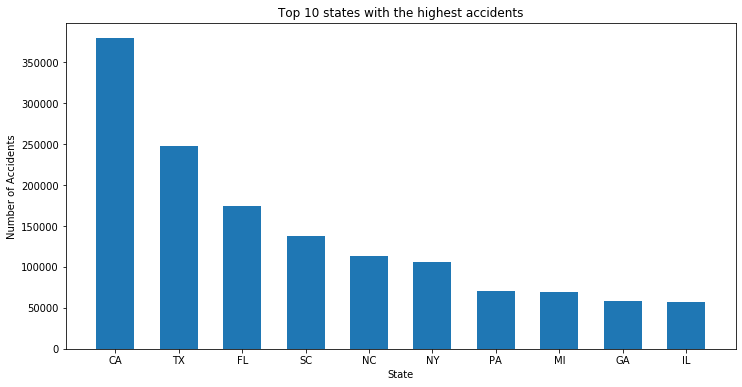

In [18]:
x = Accidents_per_State_Top10['State']
y = Accidents_per_State_Top10['Accidents']
   
fig = plt.figure(figsize = (12, 6)) 
  
# creating the bar plot 
plt.bar(x, y, width = 0.6)  
  
plt.xlabel("State") 
plt.ylabel("Number of Accidents") 
plt.title("Top 10 states with the highest accidents") 
plt.show() 

In [37]:
# Top 10 state by population
US_state_Pop = pd.read_csv('United States estimated population 2020.csv')
US_state_Pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,10,0,0,0,United States,308745538,308758105,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329484123
1,20,3,0,0,South Region,114555744,114563042,114869421,116019483,117264196,118397213,119666248,121049223,122419547,123611036,124649156,125686544,126662754
2,20,4,0,0,West Region,71945553,71946912,72101630,72791588,73482530,74173435,74933166,75751299,76570256,77267367,77841481,78300384,78654756
3,20,2,0,0,Midwest Region,66927001,66929737,66975328,67164092,67348275,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68316744
4,20,1,0,0,Northeast Region,55317240,55318414,55380764,55608318,55782661,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55849869


In [39]:
US_state_Pop.isnull().any().sum()

0

In [40]:
US_state_Pop = US_state_Pop[['NAME','POPESTIMATE2020']]
US_state_Top10 = US_state_Pop.sort_values(by = "POPESTIMATE2020",ascending=True)[5:15].reset_index()

US_state_Top10.drop(['index'],axis=1, inplace=True)
US_state_Top10

,NAME,POPESTIMATE2020
0,South Dakota,892717
1,Delaware,986809
2,Rhode Island,1057125
3,Montana,1080577
4,Maine,1350141
5,New Hampshire,1366275
6,Hawaii,1407006
7,West Virginia,1784787
8,Idaho,1826913
9,Nebraska,1937552


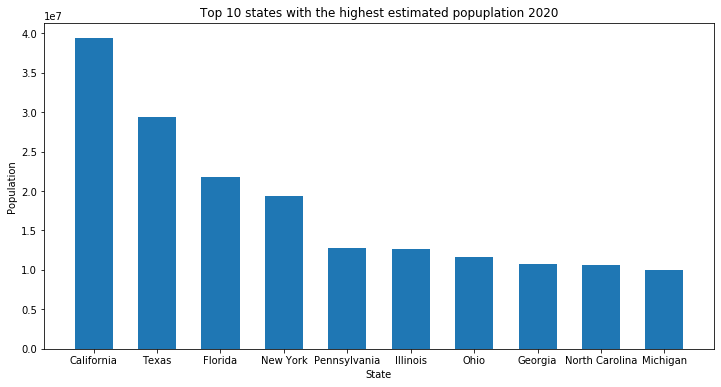

In [23]:
x = US_state_Top10['NAME']
y = US_state_Top10['POPESTIMATE2020']
   
fig = plt.figure(figsize = (12, 6)) 
  
# creating the bar plot 
plt.bar(x, y, width = 0.6) 
  
plt.xlabel("State") 
plt.ylabel("Population") 
plt.title("Top 10 states with the highest estimated popuplation 2020") 
plt.show() 

####  2. When are accidents happening most, Night or Day?

In [24]:
night_or_day = mod3_arp_df.groupby('Sunrise_Sunset')['ID'].count().reset_index()
night_or_day.rename(columns={'ID':'Accidents'}, inplace=True)
night_or_day.head(3)


,Sunrise_Sunset,Accidents
0,Day,1615620
1,Night,498034


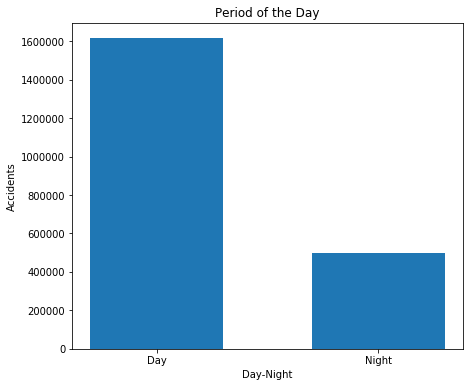

In [25]:
x = night_or_day['Sunrise_Sunset']
y = night_or_day['Accidents']
   
fig = plt.figure(figsize = (7, 6)) 
  
# creating the bar plot 
plt.bar(x, y, width = 0.6) 
  
plt.xlabel("Day-Night") 
plt.ylabel("Accidents") 
plt.title("Period of the Day") 
plt.show() 

### Conclusion
More accidents occur during day time than at night

#### 3. what time of the day do accident occur

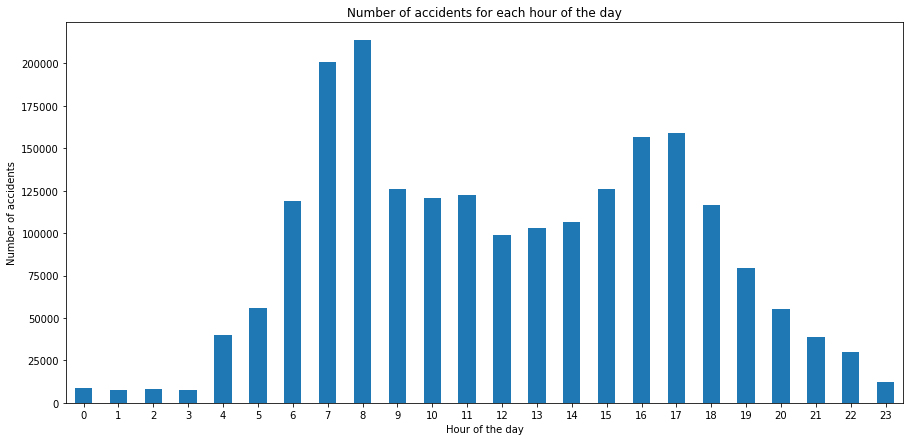

In [26]:
# Accident per hour
mod3_arp_df['hour'] = pd.DatetimeIndex(mod3_arp_df['Start_Time']).hour

plt.figure(figsize =(15,7))
mod3_arp_df.groupby(['hour']).size().plot.bar(rot=0)
plt.title('Number of accidents for each hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of accidents')
plt.show()

### Conclusion
There are two peaks in the barplot above. The first peak is between the hour of 7am and 8am, which is usually the first rush hour of the day and the second is between 4pm and 5pm which is the second rush hour of the day. More accidents occur when there are huge traffic

#### 4. Accidents that occurred each day of the week

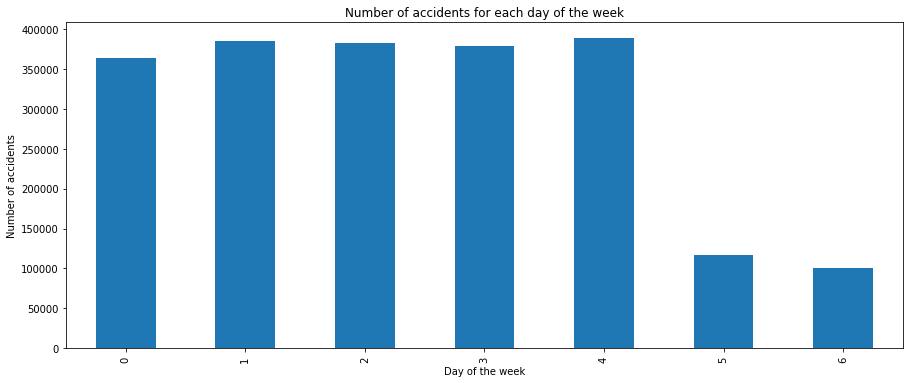

In [27]:
mod3_arp_df['dayOfWeek'] = pd.DatetimeIndex(mod3_arp_df['startTime']).dayofweek
plt.figure(figsize =(15,6))
mod3_arp_df.groupby(['dayOfWeek']).size().plot.bar()
plt.title('Number of accidents for each day of the week')
plt.ylabel('Number of accidents')
plt.xlabel('Day of the week')
plt.show()

### Conclusion
More accidents occur during the weekdays than weekends

#### 5. Accidents per month

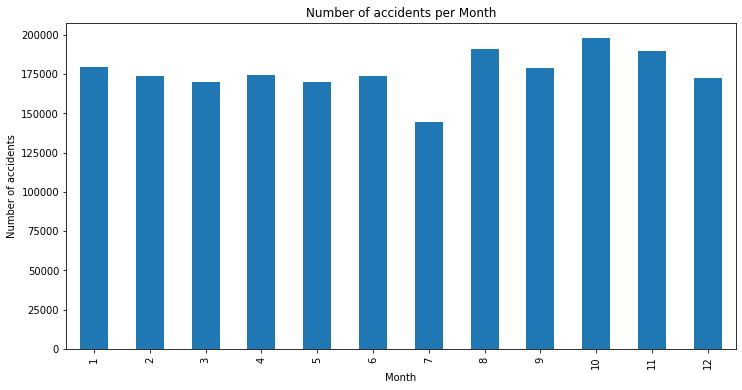

In [28]:
mod3_arp_df['Month'] = pd.DatetimeIndex(mod3_arp_df['Start_Time']).month

plt.figure(figsize =(12,6))
mod3_arp_df.groupby(['Month']).size().plot.bar()
plt.title('Number of accidents per Month')
plt.ylabel('Number of accidents')
plt.show()



### Conclusion
There are less accidents in July(7th month) than any other month.

#### 6. Accidents per year

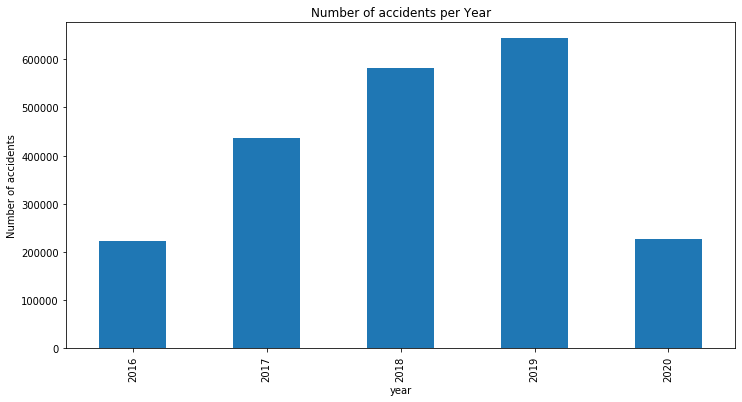

In [29]:
mod3_arp_df['year'] = pd.DatetimeIndex(mod3_arp_df['Start_Time']).year

plt.figure(figsize =(12,6))
mod3_arp_df.groupby(['year']).size().plot.bar()
plt.title('Number of accidents per Year')
plt.ylabel('Number of accidents')
plt.show()

### Conclusion
The number of accidents has been increasing on a yearly basis. These can not be confirm for year 2020 because the data available only included the first six months of 2020

# 6. Finding correlations

#### 1. Point of Interest
Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

In [32]:

pointOfInterest_df = mod3_arp_df[['Severity','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming', 'Traffic_Signal']]


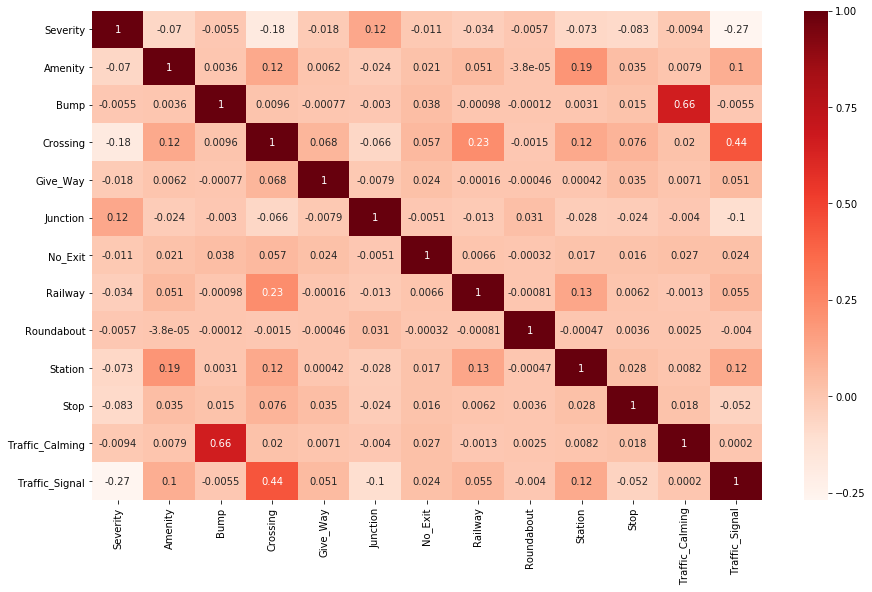

In [33]:
POI_corr = pointOfInterest_df.corr()
f, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(POI_corr, cmap="Reds", annot=True)


There is no significant correlation between severity and the various POI. 
Among the POI, Bump and Traffic_Calming have a fairly strong positive correlation. While crossing
and Traffic_Signal have a weak positive correlation.

#### 2. Important features
Visibility_mi, Pressure_in, Humidity_%, Temperature_F, Weather_Condition, Wind_Speed_mph, Wind_Direction

In [34]:
imp_features_df = mod3_arp_df[['Severity','Visibility_mi','Pressure_in','Humidity_%','Temperature_F','Weather_Condition','Wind_Speed_mph','Wind_Direction']]


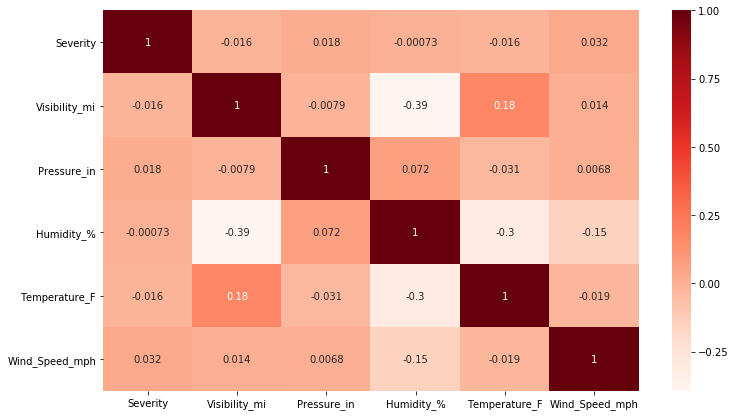

In [35]:
Imp_Features = imp_features_df.corr() 
f, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap(Imp_Features, cmap="Reds", annot=True)


There is no significant correlation between severity and the important features